In [8]:
%config IPCompleter.greedy=True

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

In [10]:
# Read in data
data_P1 = pd.read_csv('energy_inert_P1.csv')
data_P1 = data_P1.sort_values('E')

data_P5 = pd.read_csv('energy_inert_P5.csv')
data_P5 = data_P5.sort_values('E')

data_P10 = pd.read_csv('energy_inert_P10.csv')
data_P10 = data_P10.sort_values('E')

data_P20 = pd.read_csv('energy_inert_P20.csv')
data_P20 = data_P20.sort_values('E')

data_P40 = pd.read_csv('energy_inert_P40.csv')
data_P40 = data_P40.sort_values('E')

data_P80 = pd.read_csv('energy_inert_P80.csv')
data_P80 = data_P80.sort_values('E')

In [11]:
# Apply data smoothing
smoothed_data_P1 = data_P1[['E','KE']].apply(savgol_filter,  window_length=401, polyorder=4)
smoothed_data_P5 = data_P5[['E','KE']].apply(savgol_filter,  window_length=401, polyorder=4)
smoothed_data_P10 = data_P10[['E','KE']].apply(savgol_filter,  window_length=401, polyorder=4)
smoothed_data_P20 = data_P20[['E','KE']].apply(savgol_filter,  window_length=401, polyorder=4)
smoothed_data_P40 = data_P40[['E','KE']].apply(savgol_filter,  window_length=401, polyorder=4)
smoothed_data_P80 = data_P80[['E','KE']].apply(savgol_filter,  window_length=401, polyorder=4)

In [12]:
# interpolate to calculate derivative
interpolated_smoothed_data_P1 = interp1d(smoothed_data_P1['E'], smoothed_data_P1['KE'], kind='cubic')
min_val_P1 = smoothed_data_P1['E'].min()
max_val_P1 = smoothed_data_P1['E'].max()
dx_P1 = (max_val_P1 - min_val_P1) / 1000

interpolated_smoothed_data_P5 = interp1d(smoothed_data_P5['E'], smoothed_data_P5['KE'], kind='cubic')
min_val_P5 = smoothed_data_P5['E'].min()
max_val_P5 = smoothed_data_P5['E'].max()
dx_P5 = (max_val_P5 - min_val_P5) / 1000

interpolated_smoothed_data_P10 = interp1d(smoothed_data_P10['E'], smoothed_data_P10['KE'], kind='cubic')
min_val_P10 = smoothed_data_P10['E'].min()
max_val_P10 = smoothed_data_P10['E'].max()
dx_P10 = (max_val_P10 - min_val_P10) / 1000

interpolated_smoothed_data_P20 = interp1d(smoothed_data_P20['E'], smoothed_data_P20['KE'], kind='cubic')
min_val_P20 = smoothed_data_P20['E'].min()
max_val_P20 = smoothed_data_P20['E'].max()
dx_P20 = (max_val_P20 - min_val_P20) / 1000

interpolated_smoothed_data_P40 = interp1d(smoothed_data_P40['E'], smoothed_data_P40['KE'], kind='cubic')
min_val_P40 = smoothed_data_P40['E'].min()
max_val_P40 = smoothed_data_P40['E'].max()
dx_P40 = (max_val_P40 - min_val_P40) / 1000

interpolated_smoothed_data_P80 = interp1d(smoothed_data_P80['E'], smoothed_data_P80['KE'], kind='cubic')
min_val_P80 = smoothed_data_P80['E'].min()
max_val_P80 = smoothed_data_P80['E'].max()
dx_P80 = (max_val_P80 - min_val_P80) / 1000

In [13]:
window_len = 5

x_P1 = np.linspace(min_val_P1 + dx_P1, max_val_P1 - dx_P1, num=1000-2, endpoint=True)
y_P1 = interpolated_smoothed_data_P1(x_P1)
y_deriv_P1 = [(interpolated_smoothed_data_P1(ex + dx_P1 / 2) 
                - interpolated_smoothed_data_P1(ex - dx_P1 / 2)) 
               / dx_P1
           for ex in x_P1]
y_deriv_smooth_P1 = savgol_filter(y_deriv_P1, window_length=window_len, polyorder=1)

x_P5 = np.linspace(min_val_P5 + dx_P5, max_val_P5 - dx_P5, num=1000-2, endpoint=True)
y_P5 = interpolated_smoothed_data_P5(x_P5)
y_deriv_P5 = [(interpolated_smoothed_data_P5(ex + dx_P5 / 2) 
                - interpolated_smoothed_data_P5(ex - dx_P5 / 2)) 
               / dx_P5
           for ex in x_P5]
y_deriv_smooth_P5 = savgol_filter(y_deriv_P5, window_length=window_len, polyorder=1)

x_P10 = np.linspace(min_val_P10 + dx_P10, max_val_P10 - dx_P10, num=1000-2, endpoint=True)
y_P10 = interpolated_smoothed_data_P10(x_P10)
y_deriv_P10 = [(interpolated_smoothed_data_P10(ex + dx_P10 / 2) 
                - interpolated_smoothed_data_P10(ex - dx_P10 / 2)) 
               / dx_P10 
           for ex in x_P10]
y_deriv_smooth_P10 = savgol_filter(y_deriv_P10, window_length=window_len, polyorder=1)

x_P20 = np.linspace(min_val_P20 + dx_P20, max_val_P20 - dx_P20, num=1000-2, endpoint=True)
y_P20 = interpolated_smoothed_data_P20(x_P20)
y_deriv_P20 = [(interpolated_smoothed_data_P20(ex + dx_P20 / 2) 
                - interpolated_smoothed_data_P20(ex - dx_P20 / 2)) 
               / dx_P20 
           for ex in x_P20]
y_deriv_smooth_P20 = savgol_filter(y_deriv_P20, window_length=window_len, polyorder=1)

x_P40 = np.linspace(min_val_P40 + dx_P40, max_val_P40 - dx_P40, num=1000-2, endpoint=True)
y_P40 = interpolated_smoothed_data_P40(x_P40)
y_deriv_P40 = [(interpolated_smoothed_data_P40(ex + dx_P40 / 2) 
                - interpolated_smoothed_data_P40(ex - dx_P40 / 2)) 
               / dx_P40 
           for ex in x_P40]
y_deriv_smooth_P40 = savgol_filter(y_deriv_P40, window_length=window_len, polyorder=1)
                                   
x_P80 = np.linspace(min_val_P80 + dx_P80, max_val_P80 - dx_P80, num=1000-2, endpoint=True)
y_P80 = interpolated_smoothed_data_P80(x_P80)
y_deriv_P80 = [(interpolated_smoothed_data_P80(ex + dx_P80 / 2) 
                - interpolated_smoothed_data_P80(ex - dx_P80 / 2)) 
               / dx_P80 
           for ex in x_P80]
y_deriv_smooth_P80 = savgol_filter(y_deriv_P80, window_length=window_len, polyorder=1)


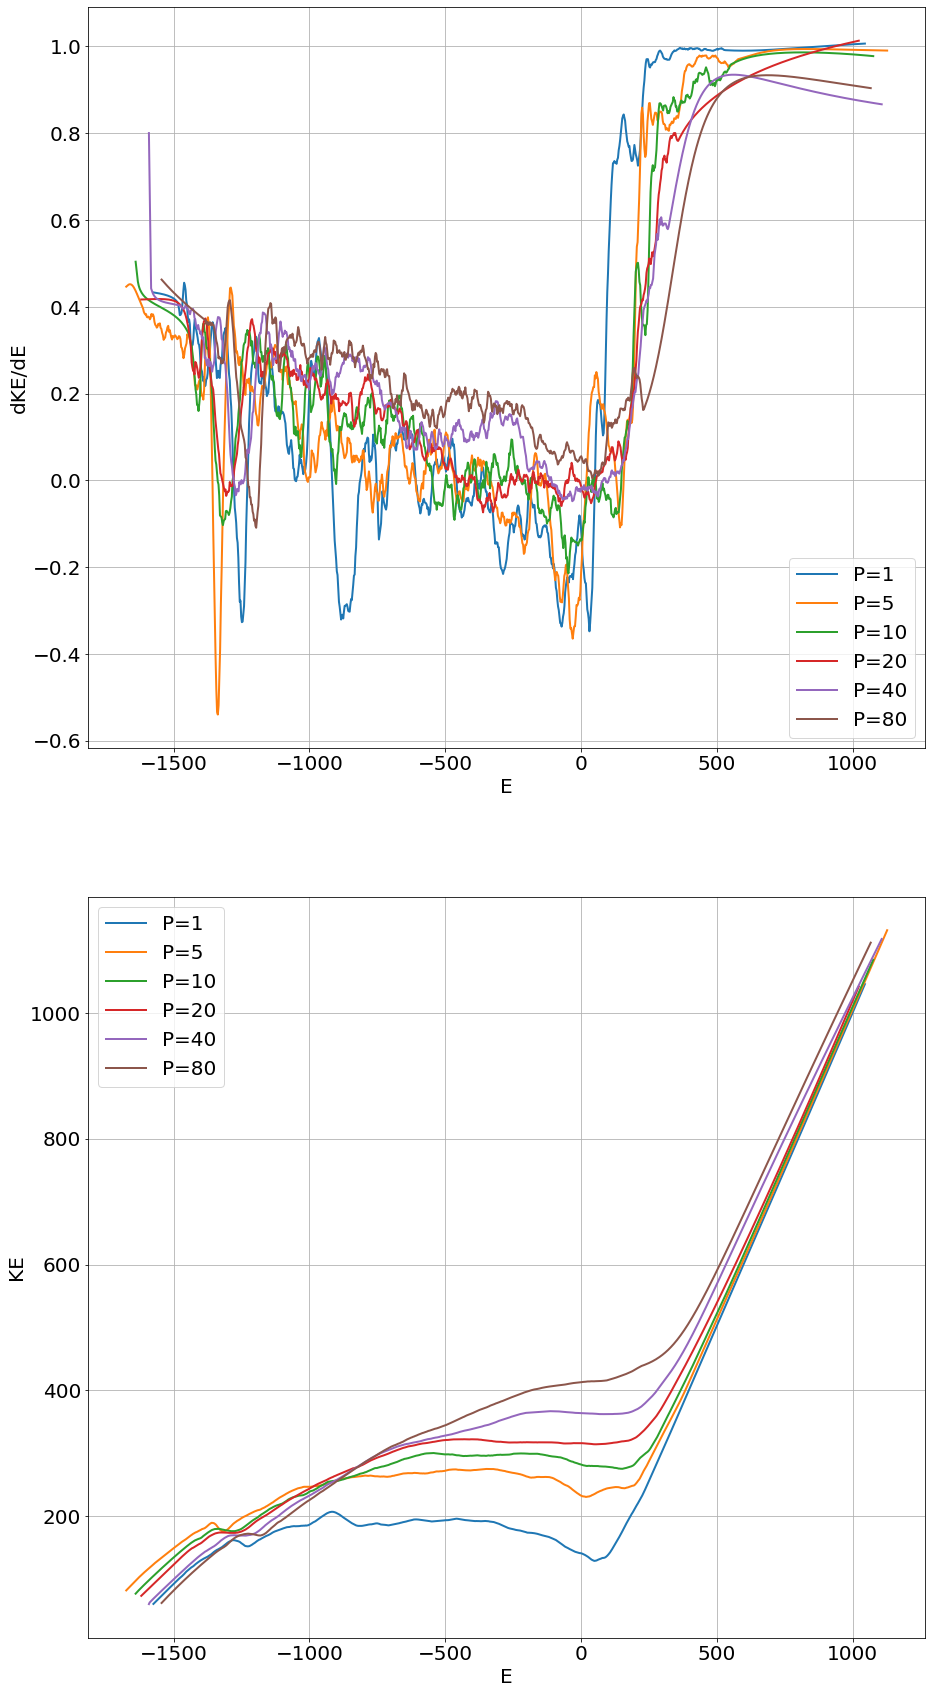

In [15]:
plt.rc('font', size=20)
fig, axis = plt.subplots(2, figsize=(15,30))

lw = 2

axis[0].plot(x_P1, y_deriv_smooth_P1, linewidth=lw, label='P=1')
axis[0].plot(x_P5, y_deriv_smooth_P5, linewidth=lw, label='P=5')
axis[0].plot(x_P10, y_deriv_smooth_P10, linewidth=lw, label='P=10')
axis[0].plot(x_P20, y_deriv_smooth_P20, linewidth=lw, label='P=20')
axis[0].plot(x_P40, y_deriv_smooth_P40, linewidth=lw, label='P=40')
axis[0].plot(x_P80, y_deriv_smooth_P80, linewidth=lw, label='P=80')
axis[0].set_xlabel('E')
axis[0].set_ylabel('dKE/dE')
axis[0].grid()
axis[0].legend()

axis[1].plot(x_P1, y_P1, linewidth=lw, label='P=1')
axis[1].plot(x_P5, y_P5, linewidth=lw, label='P=5')
axis[1].plot(x_P10, y_P10, linewidth=lw, label='P=10')
axis[1].plot(x_P20, y_P20, linewidth=lw, label='P=20')
axis[1].plot(x_P40, y_P40, linewidth=lw, label='P=40')
axis[1].plot(x_P80, y_P80, linewidth=lw, label='P=80')
axis[1].set_xlabel('E')
axis[1].set_ylabel('KE')
axis[1].grid()
axis[1].legend()